In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 66

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/fitness_poses_csvs_out_basic.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (33 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((33 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 66)                0         
                                                                 
 dense (Dense)               (None, 20)                1340      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,583
Trainable params: 1,583
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1843.7621 - accuracy: 0.0000e+00
Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 439ms/step - loss: 1843.7621 - accuracy: 0.0000e+00 - val_loss: 926.3843 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1902.4730 - accuracy: 0.0000e+00
Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 30ms/step - loss: 1902.4730 - accuracy: 0.0000e+00 - val_loss: 789.3781 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 2378.6609 - accuracy: 0.0000e+00
Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 30ms/step - loss: 2378.6609 - accuracy: 0.0000e+00 - val_loss: 656.8751 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [===============

1/1 [==============================] - ETA: 0s - loss: 1090.7374 - accuracy: 0.6667
Epoch 00027: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 1090.7374 - accuracy: 0.6667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 28/1000
1/1 [==============================] - ETA: 0s - loss: 218.9693 - accuracy: 0.6667
Epoch 00028: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 37ms/step - loss: 218.9693 - accuracy: 0.6667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 367.6275 - accuracy: 0.5000
Epoch 00029: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 32ms/step - loss: 367.6275 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 681.2690 -

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1. 0. 0.]
0


# 混同行列

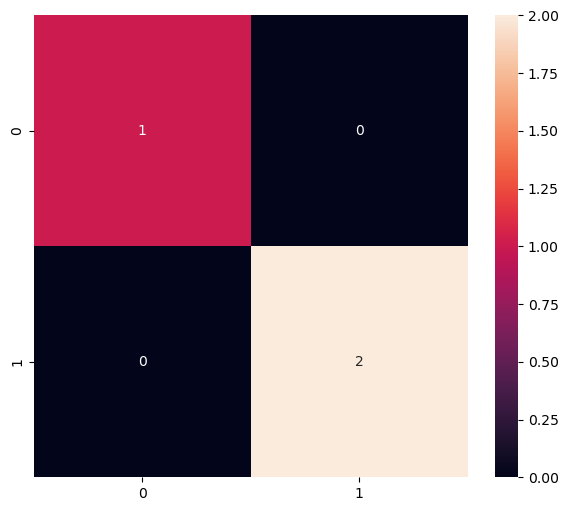

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

4224

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 543 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1. 0. 0.]
0
